In [1]:
from classy import Class

In [2]:
# Class is a class of cosmological parameters
LambdaCDM = Class()

In [3]:
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67321,'A_s':2.1e-9,'n_s':0.966,'tau_reio':0.0543})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
LambdaCDM.compute()

In [4]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [5]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

In [6]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc

In [7]:
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [8]:
Curv = Class()
# pass input parameters
Curv.set({'omega_b':0.0223828,
          'omega_cdm':0.1201075,
          'h':0.67321,
          'A_s':2.1e-9,
          'n_s':0.966,
          'tau_reio':0.0543,
          'Omega_k':0.1})
Curv.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
Curv.compute()

In [9]:
# get all C_l output
curv_cls = Curv.lensed_cl(2500)
curv_ll = curv_cls['ell'][2:]
curv_clTT = curv_cls['tt'][2:]
curv_clEE = curv_cls['ee'][2:]
curv_clPP = curv_cls['pp'][2:]

In [10]:
DEFluid = Class()
# pass input parameters
DEFluid.set({'omega_b':0.0223828,
          'omega_cdm':0.1201075,
          'h':0.67321,
          'A_s':2.1e-9,
          'n_s':0.966,
          'tau_reio':0.0543,
          'Omega_fld': 0.3,
          'Omega_scf': 0})
DEFluid.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
DEFluid.compute()

In [11]:
# get all C_l output
DE_cls = DEFluid.lensed_cl(2500)
DE_ll = DE_cls['ell'][2:]
DE_clTT = DE_cls['tt'][2:]
DE_clEE = DE_cls['ee'][2:]
DE_clPP = DE_cls['pp'][2:]

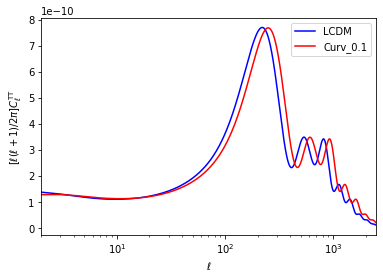

In [12]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'b-',label='LCDM')
plt.plot(curv_ll,curv_clTT*curv_ll*(curv_ll+1)/2./pi,'r-',label='Curv_0.1')
plt.legend()

In [13]:
curv_Pk = [] # P(k) in (Mpc/h)**3
DE_Pk = [] 
h = Curv.h() # get reduced Hubble for conversions to 1/Mpc
hDE = DEFluid.h()
for k in kk:
    curv_Pk.append(Curv.pk(k*h,0.)*h**3) # function .pk(k,z)
    DE_Pk.append(DEFluid.pk(k*hDE,0.)*h**3)

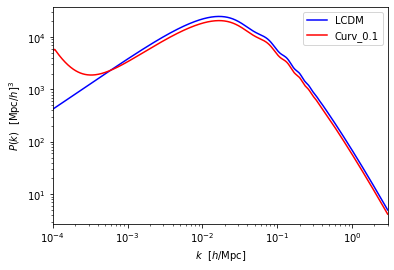

In [14]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-',label='LCDM')
plt.plot(kk,curv_Pk, 'r-', label='Curv_0.1')
plt.legend()

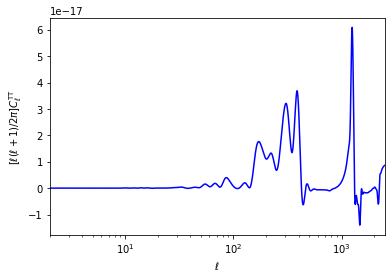

In [15]:
plt.figure(3)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,(clTT-DE_clTT)*ll*(ll+1)/2./pi,'b-',label='LCDM')

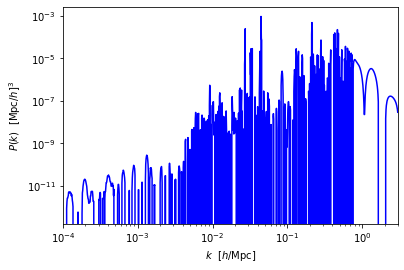

In [16]:
plt.figure(4)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,np.array(Pk)-np.array(DE_Pk),'b-')